In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [2]:
import os
import pathlib
import random
!pip install numpy==1.21.6
import numpy as np
import pandas as pd
from PIL import Image
from random import shuffle
import matplotlib.pyplot as plt

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
PATH= '/content/MyDrive/"My Drive"/train'
print(PATH)

/content/MyDrive/"My Drive"/train


In [5]:
data_root = pathlib.Path('/content/MyDrive/My Drive/Mini_Project/train')
print(data_root)
all_image_paths = list(data_root.glob('*.jpeg'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)
image_count = len(all_image_paths)
print("count : "+str(image_count))

/content/MyDrive/My Drive/Mini_Project/train
count : 35165


In [6]:
df=pd.read_csv('MyDrive/My Drive/Mini_Project/trainLabels.csv')
print(df.head())

      image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1


In [7]:
# label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names=[i for i in range(5)]
print('label_names : '+str(label_names))

label_to_index = dict((name, index) for index,name in enumerate(label_names))

label_names : [0, 1, 2, 3, 4]


In [8]:
all_image_labels = list(df['level'])

In [9]:
'''function to load folder into arrays and 
then it returns that same array'''
def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, 'train', file)
         for file in os.listdir(path) if      file.endswith('.jpeg')])
    return image_files

In [10]:
x=loadImages(data_root)

In [11]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [12]:
df['level'].value_counts()

0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64

In [13]:
DIR = data_root

# Want to know how we should format the height x width image data dimensions
# for inputting to a keras model
def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        data_root = os.path.join(DIR, img)
        if img_count<250:
            data = np.array(Image.open(data_root))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

get_size_statistics()

Average Height: 700.52
Max Height: 768
Min Height: 679


Average Width: 1024.0
Max Width: 1024
Min Width: 1024


In [14]:
def label_img(name):
    # print(name)
    if(' (' in name):
      n=name.split('.')[0]
      n=n[:-4]      
    else:
      n=name.split('.')[0]
    cdf = df[df['image'] == n]
    label = cdf['level'].values[0]
    l=[0]*5
    l[label]=1
    return np.array(l)

In [15]:
# Detection of Diabetic Retinopathy

IMG_SIZE = 299

def load_training_data():
    DIR = data_root
    train_data = []
    img_count = 0
    zc=0
    oc=0
    for img in os.listdir(data_root):
        label = label_img(img)
        img_count = img_count+1
        if(label[0]==1):
          zc+=1
        else:
          oc+=1
        pat = os.path.join(data_root, img)
        if(img_count>250):
            break
        if img_count<250:
            img = Image.open(pat)
            img = img.resize((IMG_SIZE,299), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
        
    shuffle(train_data)
    return train_data
# def load_training_data():
#     train_data = []
#     img_count = 0
#     zc=0
#     oc=0
#     for img in os.listdir(data_root):
#         label = label_img(img)
#         img_count = img_count+1
#         if(label[0]==0):
#           zc+=1
#         else:
#           oc+=1
#         pat = os.path.join(data_root, img)
#         # To make training data distribution uniform
#         if(zc!=oc):
#           continue
#         if(img_count>250):
#             break
#         if img_count<250:
#             img = Image.open(pat)
#             img = img.resize((IMG_SIZE,299), Image.ANTIALIAS)
#             train_data.append([np.array(img), label])
        
#     shuffle(train_data)
#     return train_data

In [16]:
# Grading of Diabetic Retinopathy

def load_training_data2():
    train_data = []
    img_count = 0
    for img in os.listdir(data_root):
        label = label_img(img)
        if(list(label)[0]==1):
          continue
        img_count = img_count+1
        pat = os.path.join(data_root, img)
        if(img_count>250):
            break
        if img_count<250:
            img = Image.open(pat)
            img = img.resize((IMG_SIZE,299), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
        
    shuffle(train_data)
    return train_data

In [17]:
train_data = load_training_data()
print(len(train_data))
# train, validate, test = np.split(train_data, [int(.6*len(train_data)), int(.8*len(train_data))])
train, test = np.split(train_data, [int(.8*len(train_data))])

249


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [19]:
train_data2 = load_training_data2()
print(len(train_data2))
train2, test2 = np.split(train_data2, [int(.8*len(train_data2))])

249


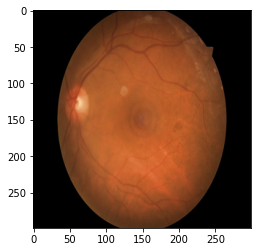

In [20]:
plt.imshow(train_data2[15][0])#, cmap = 'gist_gray')

In [21]:
trainImages = np.array([i[0] for i in train]).reshape(-1, 299, 299, 3)
trainImages2 = np.array([i[0] for i in train2]).reshape(-1, 299, 299, 3)
trainLabels = np.array([i[1] for i in train])

testImages = np.array([i[0] for i in test]).reshape(-1, 299, 299, 3)
testImages2 = np.array([i[0] for i in test2]).reshape(-1, 299, 299, 3)
trainLabels1 = np.array([0 if(i[1][0]==1) else 1 for i in train])
testLabels1 = np.array([0 if(i[1][0]==1) else 1 for i in test])

li=[]
for i in train2:
  if(i[1][1]==1):
    li.append(1)
  if(i[1][2]==1):
    li.append(2)
  if(i[1][3]==1):
    li.append(3)
  if(i[1][4]==1):
    li.append(4)

trainLabels2 = np.array(li)
# print(trainLabels1)
# print(trainLabels2)


zi=[]
for i in test2:
  if(i[1][1]==1):
    zi.append(1)
  if(i[1][2]==1):
    zi.append(2)
  if(i[1][3]==1):
    zi.append(3)
  if(i[1][4]==1):
    zi.append(4)
testLabels2=np.array(zi)
# print(testLabels1)
# print(testLabels2)

trainImages.shape

(199, 299, 299, 3)

In [22]:
import tensorflow as tf
import keras
from keras import optimizers
from keras.preprocessing import image
from keras.models import Sequential
from keras.models import Model
from keras.models import load_model
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Dropout, Flatten, LeakyReLU, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions

from keras.layers import LeakyReLU
LR = LeakyReLU()
LR.__name__ = 'relu'

from keras.applications.xception import Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

from keras.callbacks import ModelCheckpoint   
checkpointer = ModelCheckpoint(filepath='DR.model.best.hdf5', monitor = 'val_acc', mode = 'auto',period = 1,verbose=1, save_best_only=True)

from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=10, epsilon=0.0001, min_lr=0.001)

In [23]:
y=to_categorical(trainLabels1)
Y=to_categorical(trainLabels2)
# y
p=list(Y)
for i in range(len(p)):
  z=list(p[i])
  z.pop(0)
  p[i]=np.array(z)

# print(y)
p=np.array(p)
# p



In [24]:
y1=to_categorical(testLabels1)
Y1=to_categorical(testLabels2)
# print(y1)
p1=list(Y1)
for i in range(len(p1)):
  z=list(p1[i])
  z.pop(0)
  p1[i]=np.array(z)

# print(y1)
p1=np.array(p1)
# p1

In [25]:
IV3model = InceptionV3(include_top=False, weights='imagenet', input_tensor=None, input_shape=(299,299,3), pooling='avg')#, classes=1000)

87910968/87910968 [==============================] - 0s 0us/step


In [26]:
Xmodel = Xception(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling='avg')#, classes=1000)

83683744/83683744 [==============================] - 0s 0us/step


In [27]:
IRV2model = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling='avg')#, classes=1000)

219055592/219055592 [==============================] - 2s 0us/step


In [28]:
# fit model on dataset
def fit_model(trainX, trainy):
	# define model
  for layer in IV3model.layers:
      layer.trainable = False
  for layer in Xmodel.layers:
      layer.trainable = False
  for layer in IRV2model.layers:
      layer.trainable = False

  def mod(m):
      # model = Model(inputs=m.inputs, outputs=m.layers[-1].output)
      # print(m.inputs)
      x = m.layers[-1].output
      # x=Flatten()(x)
      x=keras.layers.Dense(1024)(x)
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.25)(x)
      x=keras.layers.Dense(512)(x)
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.5)(x)
      x=keras.layers.Dense(256)(x)
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.5)(x)
      x=keras.layers.Dense(128)(x)
      # return x
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.5)(x)
      return x
      # x=keras.layers.Dense(2,activation='softmax')(x)#, activation=LeakyReLU(alpha=0.2))(x)
      # x=Activation('softmax')(x)
      # return x
      # sdnn=Model(inputs=model.input,outputs=x)  
      # return sdnn
      # sdnn.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 2e-4), metrics = ['accuracy'])
    # fit model
      # sdnn.fit(x=trainImages,y=to_categorical(trainLabels1),batch_size=32,epochs=300,validation_split=0.2,class_weight='auto', callbacks=[early_stopping,checkpointer,reduce_lr],verbose=1)
      # return sdnn
  sdnn1 = mod(IV3model)
  sdnn2 = mod(Xmodel)
  sdnn3 = mod(IRV2model)
  # print(sdnn1)
  x = keras.layers.Average()([sdnn1, sdnn2, sdnn3])
  main_output = Dense(2, activation='softmax')(x)
  # print(IV3model.inputs)
  # print(type(IV3model.inputs))
  model = Model(inputs=[IV3model.inputs[0],Xmodel.inputs[0],IRV2model.inputs[0]], outputs=[main_output])
  # print(model.summary())
  return model

In [ ]:
res = fit_model(trainImages,to_categorical(trainLabels1))	
# res
from keras.utils import plot_model
plot_model(res, to_file='model.png',show_shapes=False,show_layer_names=False)

In [30]:
res.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 2e-4), metrics = ['accuracy'])

In [31]:
res.fit(x=[trainImages,trainImages,trainImages],y=y,batch_size=32,epochs=300,validation_split=0.2,class_weight=None, callbacks=[early_stopping,checkpointer,reduce_lr],verbose=0)

In [32]:
res.evaluate(x=[testImages,testImages,testImages], y=to_categorical(testLabels1))#, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

2/2 [==============================] - 5s 5s/step - loss: 0.8643 - accuracy: 0.8400


[0.8642941117286682, 0.8399999737739563]

In [33]:
resfeatures = res.predict([testImages,testImages,testImages],batch_size = 32, verbose = 0)
# print(resfeatures)

In [34]:
RN50model = ResNet50(weights='imagenet',pooling = 'avg',include_top = False)
# for l in RN50model.layers:
  # l.name = "%s_workaround1" % l.name

94765736/94765736 [==============================] - 0s 0us/step


In [35]:
DN169model = DenseNet169(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling='avg')#, classes=1000)
# for l in DN169model.layers:
#   l.name = "%s_workaround2" % l.name

51877672/51877672 [==============================] - 0s 0us/step


In [36]:
DN201model = DenseNet201(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling='avg')#, classes=1000)
# for l in DN201model.layers:
#   l.name = "%s_workaround3" % l.name

74836368/74836368 [==============================] - 0s 0us/step


In [37]:
# fit model on dataset
def fit_model1(trainX, trainy):
	# define model
  for layer in RN50model.layers:
      layer.trainable = True
      layer._name = layer.name + str("_mirror1")
  for layer in DN169model.layers:
      layer.trainable = True
      layer._name = layer.name + str("_mirror2")
  for layer in DN201model.layers:
      layer.trainable = True
      layer._name = layer.name + str("_mirror3")
  
  def mod(m):
      # model = Model(inputs=m.inputs, outputs=m.layers[-1].output)
      # print(m.inputs)
      x = m.layers[-1].output
      # x=Flatten()(x)
      x=keras.layers.Dense(2048)(x)#, activation=LeakyReLU(alpha=0.2))(x)
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.25)(x)
      x=keras.layers.Dense(1024)(x)#, activation=LeakyReLU(alpha=0.2))(x)
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.5)(x)
      x=keras.layers.Dense(512)(x)#, activation=LeakyReLU(alpha=0.2))(x)
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.5)(x)
      x=keras.layers.Dense(256)(x)#, activation=LeakyReLU(alpha=0.2))(x)
      # return x
      x=LeakyReLU(alpha=0.2)(x)
      x=Dropout(0.5)(x)
      return x
      x=keras.layers.Dense(4,activation='softmax')(x)#, activation=LeakyReLU(alpha=0.2))(x)
      # x=Activation('softmax')(x)
      # return x
      sdnn=Model(inputs=model.input,outputs=x)  

  sdnn1 = mod(RN50model)
  sdnn2 = mod(DN169model)
  sdnn3 = mod(DN201model)
  # print(sdnn1)
  x = keras.layers.Average()([sdnn1, sdnn2, sdnn3])
  main_output1 = Dense(4, activation='softmax', name='main_output')(x)
  # return x
  # print(RN50model.inputs)
  # print(type(RN50model.inputs))
  # Inputs = list of tensors
  # output = tensor
  # print(main_output)
  model = Model(inputs=[RN50model.inputs[0],DN169model.inputs[0],DN201model.inputs[0]], outputs=[main_output1])
  # print(model.summary())
  return model

In [ ]:
res1 = fit_model1(trainImages2,p)	
# res1
from keras.utils import plot_model
plot_model(res1, to_file='model1.png', show_shapes=False, show_layer_names=False)

In [39]:
res1.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 2e-4), metrics = ['accuracy'])

In [ ]:
res1.fit(x=[trainImages2,trainImages2,trainImages2],y=p,batch_size=32,epochs=300,validation_split=0.2,class_weight=None, callbacks=[early_stopping,checkpointer,reduce_lr],verbose=0)

In [43]:
res1.evaluate(x=[testImages2,testImages2,testImages2], y=p1, batch_size=32, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

2/2 [==============================] - 19s 5s/step - loss: 1.3474 - accuracy: 0.3000


[1.3473635911941528, 0.30000001192092896]

In [44]:
res1features = res1.predict([testImages2,testImages2,testImages2],batch_size = 32, verbose = 0)
# print(res1features)

2/2 [==============================] - 8s 411ms/step


In [57]:
# !pip install httplib2==0.15.0
# !pip install google-api-python-client==1.6

In [58]:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # 1. Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [59]:
# res.save('model.h5')  # creates a HDF5 file 'model.h5'
# model_file = drive.CreateFile({'title' : 'model.h5'})  
# model_file.SetContentFile('model.h5')
# model_file.Upload()

# load the weights that yielded the best validation accuracy
# sdnn1.load_weights('sdnn1.best.hdf5')
# sdnn2.load_weights('sdnn2.best.hdf5')
# sdnn3.load_weights('sdnn3.best.hdf5')
# sdnn4.load_weights('sdnn4.best.hdf5')
# sdnn5.load_weights('sdnn5.best.hdf5')
# sdnn6.load_weights('sdnn6.best.hdf5')

In [60]:
# res1.save('model2.h5')  # creates a HDF5 file 'model2.h5'
# model_file = drive.CreateFile({'title' : 'model2.h5'})  
# model_file.SetContentFile('model2.h5')
# model_file.Upload()